# Загрузка Pandas и очистка данных

In [1]:
#pip install textblob
from datetime import datetime, date, time
import time
import numpy as np
import pandas as pd
import random as rand
import re
from ast import literal_eval
import textblob
from textblob import TextBlob
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'd:\sys\Users\akbear\skillfactory\Project03\main_task_new.csv')
display(df.head(10))
df.info()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
5,id_1418,Oporto,NaN,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504
7,id_825,Bratislava,['Italian'],826.0,3.0,NaN,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765
8,id_2690,Vienna,NaN,2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [3]:
df.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

In [4]:
#df = df.rename(columns=lambda x: x.lower())
df.rename(columns={'City': 'city', 'Cuisine Style': 'cuisine', 'Ranking': 'ranking', 'Price Range': 'price',
                   'Number of Reviews': 'num_rev', 'Reviews': 'rev', 'URL_TA': 'url' 
                    }, inplace=True)
df.columns

Index(['Restaurant_id', 'city', 'cuisine', 'ranking', 'Rating', 'price',
       'num_rev', 'rev', 'url', 'ID_TA'],
      dtype='object')

In [5]:
df.city.isnull().sum()

0

In [6]:
df.city.value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: city, dtype: int64

In [7]:
df.cuisine.isnull().sum()

9283

In [8]:
#заполним пропуски по кухням модой по каждому городу

df.cuisine = df.groupby("city")["cuisine"].\
    transform(lambda x: x.fillna(x.mode()[0]))

df.head(10)

,Restaurant_id,city,cuisine,ranking,Rating,price,num_rev,rev,url,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,"['European', 'Swedish']",1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,['Italian'],3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
5,id_1418,Oporto,"['European', 'Portuguese']",1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504
7,id_825,Bratislava,['Italian'],826.0,3.0,NaN,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765
8,id_2690,Vienna,"['Austrian', 'European']",2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681


In [9]:
df_cuisine = df.copy()
df_cuisine.cuisine = df_cuisine.cuisine.str.split(',')
df_cuisine = df_cuisine.explode('cuisine')
df_cuisine.cuisine = df_cuisine.cuisine.str.replace('[', '')
df_cuisine.cuisine = df_cuisine.cuisine.str.replace(']', '')
df_cuisine.cuisine = df_cuisine.cuisine.str.replace(' ', '')
df_cuisine.cuisine.value_counts().head(30)

<ipython-input-9-74b8d3a948a8>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cuisine.cuisine = df_cuisine.cuisine.str.replace('[', '')
<ipython-input-9-74b8d3a948a8>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cuisine.cuisine = df_cuisine.cuisine.str.replace(']', '')


'European'              12609
'VegetarianFriendly'    11189
'Italian'                8166
'Mediterranean'          6374
'French'                 4663
'VeganOptions'           4486
'Bar'                    4474
'Spanish'                4406
'GlutenFreeOptions'      4113
'Pub'                    3810
'Asian'                  3011
'Pizza'                  2849
'British'                2577
'Cafe'                   2393
'FastFood'               1705
'International'          1584
'Portuguese'             1537
'Seafood'                1505
'Japanese'               1464
'CentralEuropean'        1393
'American'               1315
'Sushi'                  1156
'Chinese'                1145
'Indian'                 1041
'Czech'                   844
'MiddleEastern'           782
'Thai'                    743
'Greek'                   723
'WineBar'                 697
'Austrian'                696
Name: cuisine, dtype: int64

In [10]:
df.cuisine = df.cuisine.apply(literal_eval)

In [11]:
#df['сuismax'] = df['cuisine'].apply(lambda x: len(x)) #создадим столбец с количеством кухонь в точке

In [12]:
df.ranking.isnull().sum()

0

In [13]:
#проверка города на "столичность"

#cities = []

#for i in df['city']:
#    if i not in cities:
#        cities.append(i)

#capitals = ['Paris','Stockholm','London','Berlin','Vienna','Rome','Madrid','Dublin','Brussels','Bratislava',
#           'Warsaw','Budapest','Copenhagen','Amsterdam','Lisbon','Prague','Oslo','Helsinki','Ljubljana',
#           'Athens','Luxembourg','Edinburgh']

#def capital_resturant(city):
#    if city in capitals:
#        return 1
#    else:
#        return 0

#df['capital'] = df.city.apply(capital_resturant)

#не работает

In [14]:
df.num_rev.isnull().sum()

2543

In [15]:
df.num_rev.value_counts()

2.0       1916
3.0       1636
4.0       1370
5.0       1181
6.0       1018
          ... 
2035.0       1
1618.0       1
1907.0       1
1757.0       1
995.0        1
Name: num_rev, Length: 1459, dtype: int64

In [16]:
df.num_rev = df.num_rev.fillna(df.num_rev.median()) #заполним пропуски в числе отзывов

df.num_rev.isnull().sum()

0

In [17]:
df.num_rev.value_counts()

33.0      2801
2.0       1916
3.0       1636
4.0       1370
5.0       1181
          ... 
2035.0       1
1618.0       1
1907.0       1
1757.0       1
995.0        1
Name: num_rev, Length: 1459, dtype: int64

In [18]:
df['max_rev'] = df['num_rev'].apply(lambda x: 1 if 80 < x <= 330 else 2 if x > 330 else 0)
#создадим дополнительный столбец для популярных ресторанов

df.max_rev.value_counts()

0    28140
1     8314
2     3546
Name: max_rev, dtype: int64

In [19]:
pattern = re.compile('\'\d+\/\d+\/\d+\'?') #Создаем шаблон для поиска дат в тексте отзывов
df['rev_d'] = df['rev'].apply(pattern.findall)
# Применяем шаблон. Теперь в каждой ячейке 'Reviews Date' находится список, состоящий из элементов,
#относящихся к типу данныx str (или пустой список, если даты не нашлись).
#Каждый элемент каждого списка преобразуем из типа str в тип datetime
df['rev_d'] = df['rev_d'].apply(lambda x: sorted([pd.to_datetime(i).date() for i in x]))

df['rev_d']

0        [2017-11-20, 2017-12-31]
1        [2016-06-19, 2017-07-06]
2        [2018-01-06, 2018-01-08]
3                              []
4        [2017-02-19, 2017-11-18]
                   ...           
39995    [2017-11-12, 2017-12-16]
39996    [2017-12-12, 2017-12-21]
39997    [2008-04-12, 2016-11-03]
39998    [2017-06-18, 2017-07-11]
39999    [2012-07-04, 2016-01-31]
Name: rev_d, Length: 40000, dtype: object

In [20]:
'''Далее, полученные списки дат, распределяем по двум новым столбцам 'date_1', 'date_2'.
Учитывая, что списки разной длины: состоящие из двух элементов, одного элемента и пустые, в списках, где количество элементов меньше 2, недостающие значения будем заменять NaN. Отсюда получаем:
- если в списке два элемента, первый уходит в 'date_1', второй в 'date_2'
- если в списке один элемент, то он уходит в 'date_1', в 'date_2' помещается NaN
- если список пуст в оба столбца помещается NaN'''

def func(row):
    if len(row['rev_d']) == 2:
        return row['rev_d'][0], row['rev_d'][1]
    elif len(row['rev_d']) == 1:
        return row['rev_d'][0], np.nan
    else:
        return np.nan,np.nan

df[['date_1', 'date_2']] = df[['rev_d']].apply(func, axis=1, result_type='expand')
df[['date_1', 'date_2']][:20]

,date_1,date_2
0,2017-11-20,2017-12-31
1,2016-06-19,2017-07-06
2,2018-01-06,2018-01-08
3,NaN,NaN
4,2017-02-19,2017-11-18
5,2017-05-31,2017-09-16
6,2017-08-04,2017-11-05
7,2012-06-13,2014-02-16
8,NaN,NaN
9,2017-03-27,2017-11-07


In [21]:
df['day_space'] = (df['date_2']-df['date_1']).dt.days.fillna(0) #считаем диапазон в днях и заполняем пропуски нулем

df['day_space'].sort_values(ascending=False)

7990     3207.0
10997    3137.0
39997    3127.0
8356     3096.0
19438    3094.0
          ...  
15569       0.0
29327       0.0
15563       0.0
15562       0.0
14050       0.0
Name: day_space, Length: 40000, dtype: float64

In [22]:
# добавим столбец, отражающий "свежесть" последних отзывов

df['last_rev'] = (date.today() - df['date_2']).dt.days
df['last_rev'] = df['last_rev'].apply(lambda x: 2 if x < 1380 else 1 if 1380 <= x <= 1540 else 0)

df.last_rev.value_counts()

0    21403
1    18009
2      588
Name: last_rev, dtype: int64

In [23]:
# добавим в датасет информацию о площади городов и их населении (точнее о средней плотности распределения точек общественного
# питания и их количества на душу населения). информация взята из википедии.
cities = pd.read_csv(r'd:\sys\Users\akbear\skillfactory\Project03\cities.csv', delimiter=';')
display(cities.head(10))
cities.info()

,city,count,people,area,per_people,per_sqkm
0,London,5757,8900,1570,0.65,3.67
1,Paris,4897,2200,105,2.23,46.64
2,Madrid,3108,3300,607,0.94,5.12
3,Barcelona,2734,3200,101,0.85,27.07
4,Berlin,2155,3600,890,0.60,2.42
5,Milan,2133,1400,180,1.52,11.85
6,Rome,2078,2900,1280,0.72,1.62
7,Prague,1443,1300,500,1.11,2.89
8,Lisbon,1300,500,100,2.60,13.00
9,Vienna,1166,1900,415,0.61,2.81


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        31 non-null     object 
 1   count       31 non-null     int64  
 2   people      31 non-null     int64  
 3   area        31 non-null     int64  
 4   per_people  31 non-null     float64
 5   per_sqkm    31 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.6+ KB


In [24]:
#df = df.copy()
#df['per_people'] = 0.0
#df['per_sqkm'] = 0.0
#df['net'] = 0.0

#rest_net = df.Restaurant_id.value_counts()
#rest_net = rest_net[rest_net>6]

#for i in range(len(df)):
#    for j in range(len(cities)):
#        if df.city[i] == cities.city[j]:
#            df.per_people[i] = cities.per_people[j]
#            df.per_sqkm[i] = cities.per_sqkm[j]
#            break
#    for k in range(len(rest_net)):
#        if df.Restaurant_id[i] == rest_net.index[k]:
#            df.net[i] = 1
#            break
            
#df['cui_count'] = df['cuisine'].apply(len)            
#display(df.head(10))
#df.info()

In [25]:
#А НАДО ВОТ ТАК!

t_begin = time.time()

rest_net = df.Restaurant_id.value_counts()
rest_net = rest_net[rest_net > 4].index


def func(series, dataset):
    dataset = dataset.set_index('city')
    if series['city'] in dataset.index:
        return dataset.loc[series['city']][['per_people', 'per_sqkm']].values
    return [0, 0]


df[['per_people', 'per_sqkm']] = df[['city']].apply(
    lambda x: func(x, cities), axis=1, result_type='expand')
df['net'] = df['Restaurant_id'].apply(lambda x: 1 if x in rest_net else 0)
print('Время замены: ', time.time()-t_begin, 'с')
display(df[['per_people', 'per_sqkm', 'net']])
df.net.value_counts()

Время замены:  37.85330128669739 с


,per_people,per_sqkm,net
0,2.23,46.64,0
1,0.85,4.36,1
2,0.65,3.67,1
3,0.60,2.42,0
4,0.60,2.88,1
...,...,...,...
39995,1.52,11.85,1
39996,2.23,46.64,0
39997,0.85,4.36,1
39998,0.40,1.41,1


1    23735
0    16265
Name: net, dtype: int64

In [26]:
df.price.isnull().sum()

13886

In [27]:
df.price.replace(('$', '$$ - $$$', '$$$$'), (1, 2, 3), inplace=True) #присвоим ценовым категориям числовое значение

In [28]:
df.price.value_counts()

2.0    18412
1.0     6279
3.0     1423
Name: price, dtype: int64

In [29]:
#df.price = df.groupby("Restaurant_id")["price"].\
#    transform(lambda x: x.fillna(round(x.mean(),0)))
#df.price.value_counts()

#удивительно, но попытка заполнить очевидно более правдоподобным значением среднего по сети ухудшает итоговую оценку!

In [31]:
#def func(val):
#    if np.isnan(val):
#        return rand.randint(1, 3)
#    else:
#        return val
# заполним пропуски случайным числом    
#df.price = df.price.apply(func)

#или так
df.price = df.price.apply(lambda x: rand.randint(1,3) if pd.isna(x) else x)

#df.price = df.price.fillna(1.0)

df.price.value_counts()

2.0    23108
1.0    10800
3.0     6092
Name: price, dtype: int64

In [32]:
#обработаем отзывы 
def analys(x):
    analysisPol = TextBlob(str(x)).polarity
    analysisSub = TextBlob(str(x)).subjectivity
    return  [analysisPol, analysisSub]
df[['polarity','subjectivity']] = df[['rev']].apply(analys, axis=1, result_type='expand')

<AxesSubplot:>

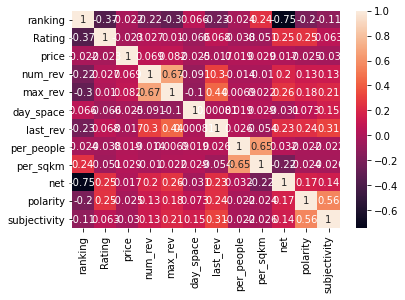

In [33]:
sns.heatmap(df.corr(), annot=True)

In [34]:
columns = ['Rating']
cus = pd.DataFrame(df, columns = columns)

cus['Vegetarian'] = df.cuisine.apply(lambda x: 1 if 'Vegetarian' in str(x) else 0)
cus['European'] = df.cuisine.apply(lambda x: 1 if 'European' in str(x) else 0)
cus['Mediterranean'] = df.cuisine.apply(lambda x: 1 if 'Mediterranean' in str(x) else 0)
cus['Italian'] = df.cuisine.apply(lambda x: 1 if 'Italian' in str(x) else 0)
cus['Vegan'] = df.cuisine.apply(lambda x: 1 if 'Vegan' in str(x) else 0)
cus['Gluten'] = df.cuisine.apply(lambda x: 1 if 'Gluten' in str(x) else 0)
cus['Bar'] = df.cuisine.apply(lambda x: 1 if 'Bar' in str(x) else 0)
cus['French'] = df.cuisine.apply(lambda x: 1 if 'French' in str(x) else 0)
#cus['Asian'] = df.cuisine.apply(lambda x: 1 if 'Asian' in str(x) else 0)
cus['Pizza'] = df.cuisine.apply(lambda x: 1 if 'Pizza' in str(x) else 0)
#cus['Spanish'] = df.cuisine.apply(lambda x: 1 if 'Spanish' in str(x) else 0)
cus['Pub'] = df.cuisine.apply(lambda x: 1 if 'Pub' in str(x) else 0)
cus['Cafe'] = df.cuisine.apply(lambda x: 1 if 'Cafe' in str(x) else 0)
cus['FastFood'] = df.cuisine.apply(lambda x: 1 if 'FastFood' in str(x) else 0)
cus['British'] = df.cuisine.apply(lambda x: 1 if 'British' in str(x) else 0)
##cus['International'] = df.cuisine.apply(lambda x: 1 if 'International' in str(x) else 0)
#cus['Japanese'] = df.cuisine.apply(lambda x: 1 if 'Japanese' in str(x) else 0)
##cus['Seafood'] = df.cuisine.apply(lambda x: 1 if 'Seafood' in str(x) else 0)
##cus['Portuguese'] = df.cuisine.apply(lambda x: 1 if 'Portuguese' in str(x) else 0)
#cus['American'] = df.cuisine.apply(lambda x: 1 if 'American' in str(x) else 0)
cus['Sushi'] = df.cuisine.apply(lambda x: 1 if 'Sushi' in str(x) else 0)
#cus['Chinese'] = df.cuisine.apply(lambda x: 1 if 'Chinese' in str(x) else 0)
#cus['WineBar'] = df.cuisine.apply(lambda x: 1 if 'WineBar' in str(x) else 0)

cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rating         40000 non-null  float64
 1   Vegetarian     40000 non-null  int64  
 2   European       40000 non-null  int64  
 3   Mediterranean  40000 non-null  int64  
 4   Italian        40000 non-null  int64  
 5   Vegan          40000 non-null  int64  
 6   Gluten         40000 non-null  int64  
 7   Bar            40000 non-null  int64  
 8   French         40000 non-null  int64  
 9   Pizza          40000 non-null  int64  
 10  Pub            40000 non-null  int64  
 11  Cafe           40000 non-null  int64  
 12  FastFood       40000 non-null  int64  
 13  British        40000 non-null  int64  
 14  Sushi          40000 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 4.6 MB


In [35]:
cus = cus.drop(['Rating'], axis = 1)

In [36]:
#сuisine = pd.get_dummies(df.cuisine.apply(pd.Series).stack()).sum(level=0)
#сuisine.info()
#сuisine

#на ошибке сказывается хуже, чем ручной способ на несколько колонок

In [37]:
city = pd.get_dummies(df.city.apply(pd.Series).stack()).sum(level=0)

In [38]:
df = pd.concat([df, city], sort = False, axis = 1)
#df = pd.concat([df, сuisine], sort = False, axis = 1)
df = pd.concat([df, cus], sort = False, axis = 1)


#df.head(5)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [39]:
df.columns

Index(['Restaurant_id', 'city', 'cuisine', 'ranking', 'Rating', 'price',
       'num_rev', 'rev', 'url', 'ID_TA', 'max_rev', 'rev_d', 'date_1',
       'date_2', 'day_space', 'last_rev', 'per_people', 'per_sqkm', 'net',
       'polarity', 'subjectivity', 'Amsterdam', 'Athens', 'Barcelona',
       'Berlin', 'Bratislava', 'Brussels', 'Budapest', 'Copenhagen', 'Dublin',
       'Edinburgh', 'Geneva', 'Hamburg', 'Helsinki', 'Krakow', 'Lisbon',
       'Ljubljana', 'London', 'Luxembourg', 'Lyon', 'Madrid', 'Milan',
       'Munich', 'Oporto', 'Oslo', 'Paris', 'Prague', 'Rome', 'Stockholm',
       'Vienna', 'Warsaw', 'Zurich', 'Vegetarian', 'European', 'Mediterranean',
       'Italian', 'Vegan', 'Gluten', 'Bar', 'French', 'Pizza', 'Pub', 'Cafe',
       'FastFood', 'British', 'Sushi'],
      dtype='object')

In [40]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)

X = df.drop(['Restaurant_id', 'city', 'Rating', 'cuisine', 'rev', 'rev_d', 'date_1', 'date_2',
             'url', 'ID_TA'       
            ], axis = 1)
y = df['Rating']

X.head(25)
#X.info()

,ranking,price,num_rev,max_rev,day_space,last_rev,per_people,per_sqkm,net,polarity,...,Vegan,Gluten,Bar,French,Pizza,Pub,Cafe,FastFood,British,Sushi
0,5570.0,2.0,194.0,1,41.0,1,2.23,46.64,0,0.700000,...,0,0,0,1,0,0,0,0,0,0
1,1537.0,3.0,10.0,0,382.0,0,0.85,4.36,1,0.687500,...,0,0,0,0,0,0,0,0,0,0
2,353.0,3.0,688.0,2,2.0,1,0.65,3.67,1,-0.333333,...,1,1,0,0,0,0,0,0,0,1
3,3458.0,2.0,3.0,0,0.0,0,0.60,2.42,0,0.500000,...,0,0,0,0,0,0,0,0,0,0
4,621.0,2.0,84.0,1,272.0,1,0.60,2.88,1,0.800000,...,0,0,0,0,0,0,0,0,0,0
5,1419.0,2.0,2.0,0,108.0,1,2.23,12.51,1,0.500000,...,0,0,0,0,0,0,0,0,0,0
6,1722.0,1.0,50.0,0,93.0,1,1.52,11.85,1,0.500000,...,0,0,0,0,1,0,0,0,0,0
7,826.0,2.0,9.0,0,613.0,0,0.70,0.81,1,1.000000,...,0,0,0,0,0,0,0,0,0,0
8,2692.0,3.0,33.0,0,0.0,0,0.61,2.81,1,0.000000,...,0,0,0,0,0,0,0,0,0,0
9,4210.0,1.0,55.0,0,225.0,1,0.72,1.62,0,0.259722,...,0,0,0,0,1,0,0,0,0,0


In [41]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [42]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [43]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [44]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [45]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2147315


In [46]:
# проверяем
#test_data.shape, train_data.shape, 
X.shape, X_train.shape, X_test.shape

((40000, 56), (30000, 56), (10000, 56))